In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [52]:
X, y = make_blobs(n_samples=500, centers=4, cluster_std=0.5, random_state=0)

In [53]:
X_X = [i[0] for i in X]
X_Y = [i[1] for i in X]

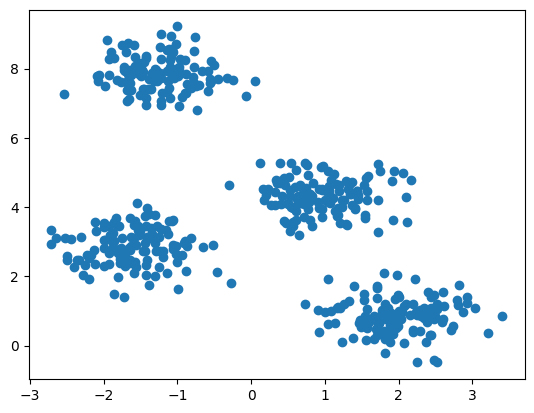

In [54]:
plt.scatter(X_X, X_Y)

In [55]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

In [56]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [57]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

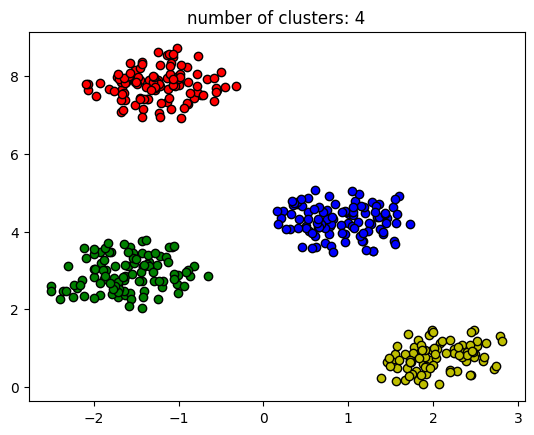

In [58]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
  
    class_member_mask = (labels == k)
  
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
  
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
  
plt.title('number of clusters: %d' % n_clusters_)
plt.show()

In [59]:
#evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f"%sc)
ari = metrics.adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f"%ari)

Silhouette Coefficient:0.50
Adjusted Rand Index: 0.70
